# Table of Contents
- [Introduction](#introduction)
- [Data Importing](#data-importing)
- [Data Exploration](#data-exploration)
- [Label Conversion](#label-conversion)
- [Handling Class Imbalance](#handling-class-imbalance)
- [Conversion of categorical features into numerical](#conversion-of-categorical-features-into-numerical)
- [Imputing missing values](#imputing-missing-values)
- [Detecting and removing outliers](#detecting-and-removing-outliers)
- [Feature Correlation](#feature-correlation)
- [Feature Selection](#feature-selection)
- [Splitting dataset](#splitting-dataset)
- [Feature Scaling](#feature-scaling)
- [Setting up evaluation metrics](#setting-up-evaluation-metrics)
- [Model Training](#model-training)
- [Model Comparison](#model-comparison)
- [Prediction from new sample data](#prediction-from-new-sample-data)
- [Conclusion](#conclusion)


# Introduction 
This notebook presents a machine learning approach to predicting whether it will rain tomorrow in Australia, using historical weather data obtained from Kaggle. The dataset includes daily weather observations from numerous Australian locations and contains various meteorological features such as temperature, humidity, wind speed, and atmospheric pressure. The primary goal is to build a predictive model that uses these features to classify the target variable RainTomorrow as either "Yes" or "No".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Importing

In [2]:
full_data = pd.read_csv('weatherAUS.csv')
full_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Data Exploration


In [3]:
full_data.shape

(145460, 23)

In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

# Label Conversion 
Both "RainToday" and "RainTomorrow" are object (Yes/No). We will convert them into binary (1/0) for our convenience.

In [5]:
full_data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
full_data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [6]:
full_data[["RainToday", "RainTomorrow"]]

,RainToday,RainTomorrow
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
145455,0.0,0.0
145456,0.0,0.0
145457,0.0,0.0
145458,0.0,0.0


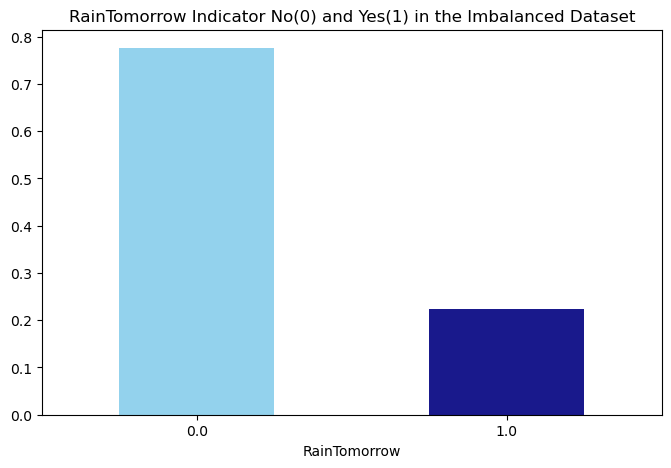

In [7]:
# Plotting label
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
full_data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

We can observe the presence of "0" and "1". There is a class imbalance. For tackling class imbalance, we will use **oversampling of minority class** (duplicating the samples of minority class to make them equal to the number of majority class samples) . Since the size of the data set is quite small, undersampling of majority class would not make much sense here. 

# Handling Class Imbalance

In [8]:
full_data.shape

(145460, 23)

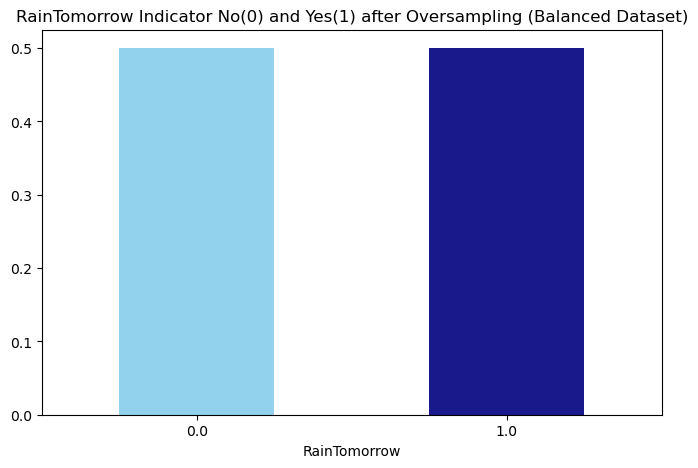

In [9]:
from sklearn.utils import resample

no = full_data[full_data.RainTomorrow == 0]
yes = full_data[full_data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [10]:
oversampled.shape

(220632, 23)

# Conversion of categorical features into numerical

In [11]:
# Using Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [12]:
oversampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220632 entries, 0 to 27220
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           220632 non-null  int32  
 1   Location       220632 non-null  int32  
 2   MinTemp        219550 non-null  float64
 3   MaxTemp        220161 non-null  float64
 4   Rainfall       217508 non-null  float64
 5   Evaporation    125221 non-null  float64
 6   Sunshine       115801 non-null  float64
 7   WindGustDir    220632 non-null  int32  
 8   WindGustSpeed  205278 non-null  float64
 9   WindDir9am     220632 non-null  int32  
 10  WindDir3pm     220632 non-null  int32  
 11  WindSpeed9am   218426 non-null  float64
 12  WindSpeed3pm   216279 non-null  float64
 13  Humidity9am    217461 non-null  float64
 14  Humidity3pm    214601 non-null  float64
 15  Pressure9am    198904 non-null  float64
 16  Pressure3pm    198886 non-null  float64
 17  Cloud9am       139293 non-null  flo

# Imputing missing values

In [13]:
# Checking for columns with missing values
total = oversampled.isnull().sum().sort_values(ascending=False)
missing = pd.concat([total], axis=1, keys=['Total'])
missing

,Total
Sunshine,104831
Evaporation,95411
Cloud3pm,85614
Cloud9am,81339
Pressure3pm,21746
Pressure9am,21728
WindGustSpeed,15354
Humidity3pm,6031
Temp3pm,4558
WindSpeed3pm,4353


We can observe these missing values as NaN below.

In [14]:
pd.set_option('display.max_columns', None)

oversampled

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,NaN,NaN,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,397,2,7.4,25.1,0.0,NaN,NaN,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,398,2,12.9,25.7,0.0,NaN,NaN,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,399,2,9.2,28.0,0.0,NaN,NaN,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,400,2,17.5,32.3,1.0,NaN,NaN,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133585,950,17,1.1,11.8,0.4,NaN,NaN,14,13.0,16,16,0.0,0.0,97.0,98.0,1020.1,1013.3,NaN,NaN,4.0,9.5,0.0,1.0
117307,3114,29,9.6,14.8,11.8,NaN,4.3,13,69.0,14,15,15.0,35.0,85.0,71.0,1015.4,1015.7,8.0,8.0,11.4,12.6,1.0,1.0
87307,503,8,24.8,31.5,0.0,5.4,3.4,9,48.0,10,2,19.0,28.0,63.0,60.0,1008.6,1006.2,5.0,6.0,28.7,30.3,0.0,1.0
56427,1721,5,4.2,7.9,11.4,NaN,NaN,12,63.0,6,11,20.0,19.0,99.0,93.0,997.2,998.9,8.0,8.0,4.6,6.8,1.0,1.0


We will impute these numerical columns with median

In [15]:
# List of columns to fill 
cols_to_fill = [
    'Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am', 'Pressure3pm', 'Pressure9am', 'WindGustSpeed', 'Humidity3pm',
    'Temp3pm', 'WindSpeed3pm', 'Humidity9am', 'Rainfall', 'RainToday','WindSpeed9am', 'Temp9am', 'MinTemp', 'MaxTemp'
]

for col in cols_to_fill:
    oversampled[col] = oversampled[col].fillna(oversampled[col].median())


In [16]:
oversampled

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,396,2,13.4,22.9,0.6,4.4,6.8,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,6.0,16.9,21.8,0.0,0.0
1,397,2,7.4,25.1,0.0,4.4,6.8,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,6.0,6.0,17.2,24.3,0.0,0.0
2,398,2,12.9,25.7,0.0,4.4,6.8,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,6.0,2.0,21.0,23.2,0.0,0.0
3,399,2,9.2,28.0,0.0,4.4,6.8,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,6.0,6.0,18.1,26.5,0.0,0.0
4,400,2,17.5,32.3,1.0,4.4,6.8,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133585,950,17,1.1,11.8,0.4,4.4,6.8,14,13.0,16,16,0.0,0.0,97.0,98.0,1020.1,1013.3,6.0,6.0,4.0,9.5,0.0,1.0
117307,3114,29,9.6,14.8,11.8,4.4,4.3,13,69.0,14,15,15.0,35.0,85.0,71.0,1015.4,1015.7,8.0,8.0,11.4,12.6,1.0,1.0
87307,503,8,24.8,31.5,0.0,5.4,3.4,9,48.0,10,2,19.0,28.0,63.0,60.0,1008.6,1006.2,5.0,6.0,28.7,30.3,0.0,1.0
56427,1721,5,4.2,7.9,11.4,4.4,6.8,12,63.0,6,11,20.0,19.0,99.0,93.0,997.2,998.9,8.0,8.0,4.6,6.8,1.0,1.0


# Detecting and removing outliers

Using the Interquartile Range (IQR), which measures the spread of the middle 50% of the data (between the lower 25% and upper 25%), we can detect and eliminate outliers.

In [17]:
Q1 = oversampled.quantile(0.25)
Q3 = oversampled.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1535.0
Location           25.0
MinTemp             9.2
MaxTemp            10.2
Rainfall            2.2
Evaporation         1.0
Sunshine            0.7
WindGustDir         9.0
WindGustSpeed      17.0
WindDir9am          8.0
WindDir3pm          8.0
WindSpeed9am       13.0
WindSpeed3pm       11.0
Humidity9am        26.0
Humidity3pm        30.0
Pressure9am         8.5
Pressure3pm         8.6
Cloud9am            2.0
Cloud3pm            2.0
Temp9am             9.2
Temp3pm             9.6
RainToday           1.0
RainTomorrow        1.0
dtype: float64


In [18]:
oversampled.shape

(220632, 23)

To calculate bounds for outliers in each column

* Lower bound = Q1 − 1.5 × IQR 
* Upper bound = Q3 + 1.5 × IQR 

In [19]:
# Removing outliers from dataset
oversampled = oversampled[~((oversampled < (Q1 - 1.5 * IQR)) |(oversampled > (Q3 + 1.5 * IQR))).any(axis=1)]
oversampled.shape

(76089, 23)

# Feature Correlation

<Axes: >

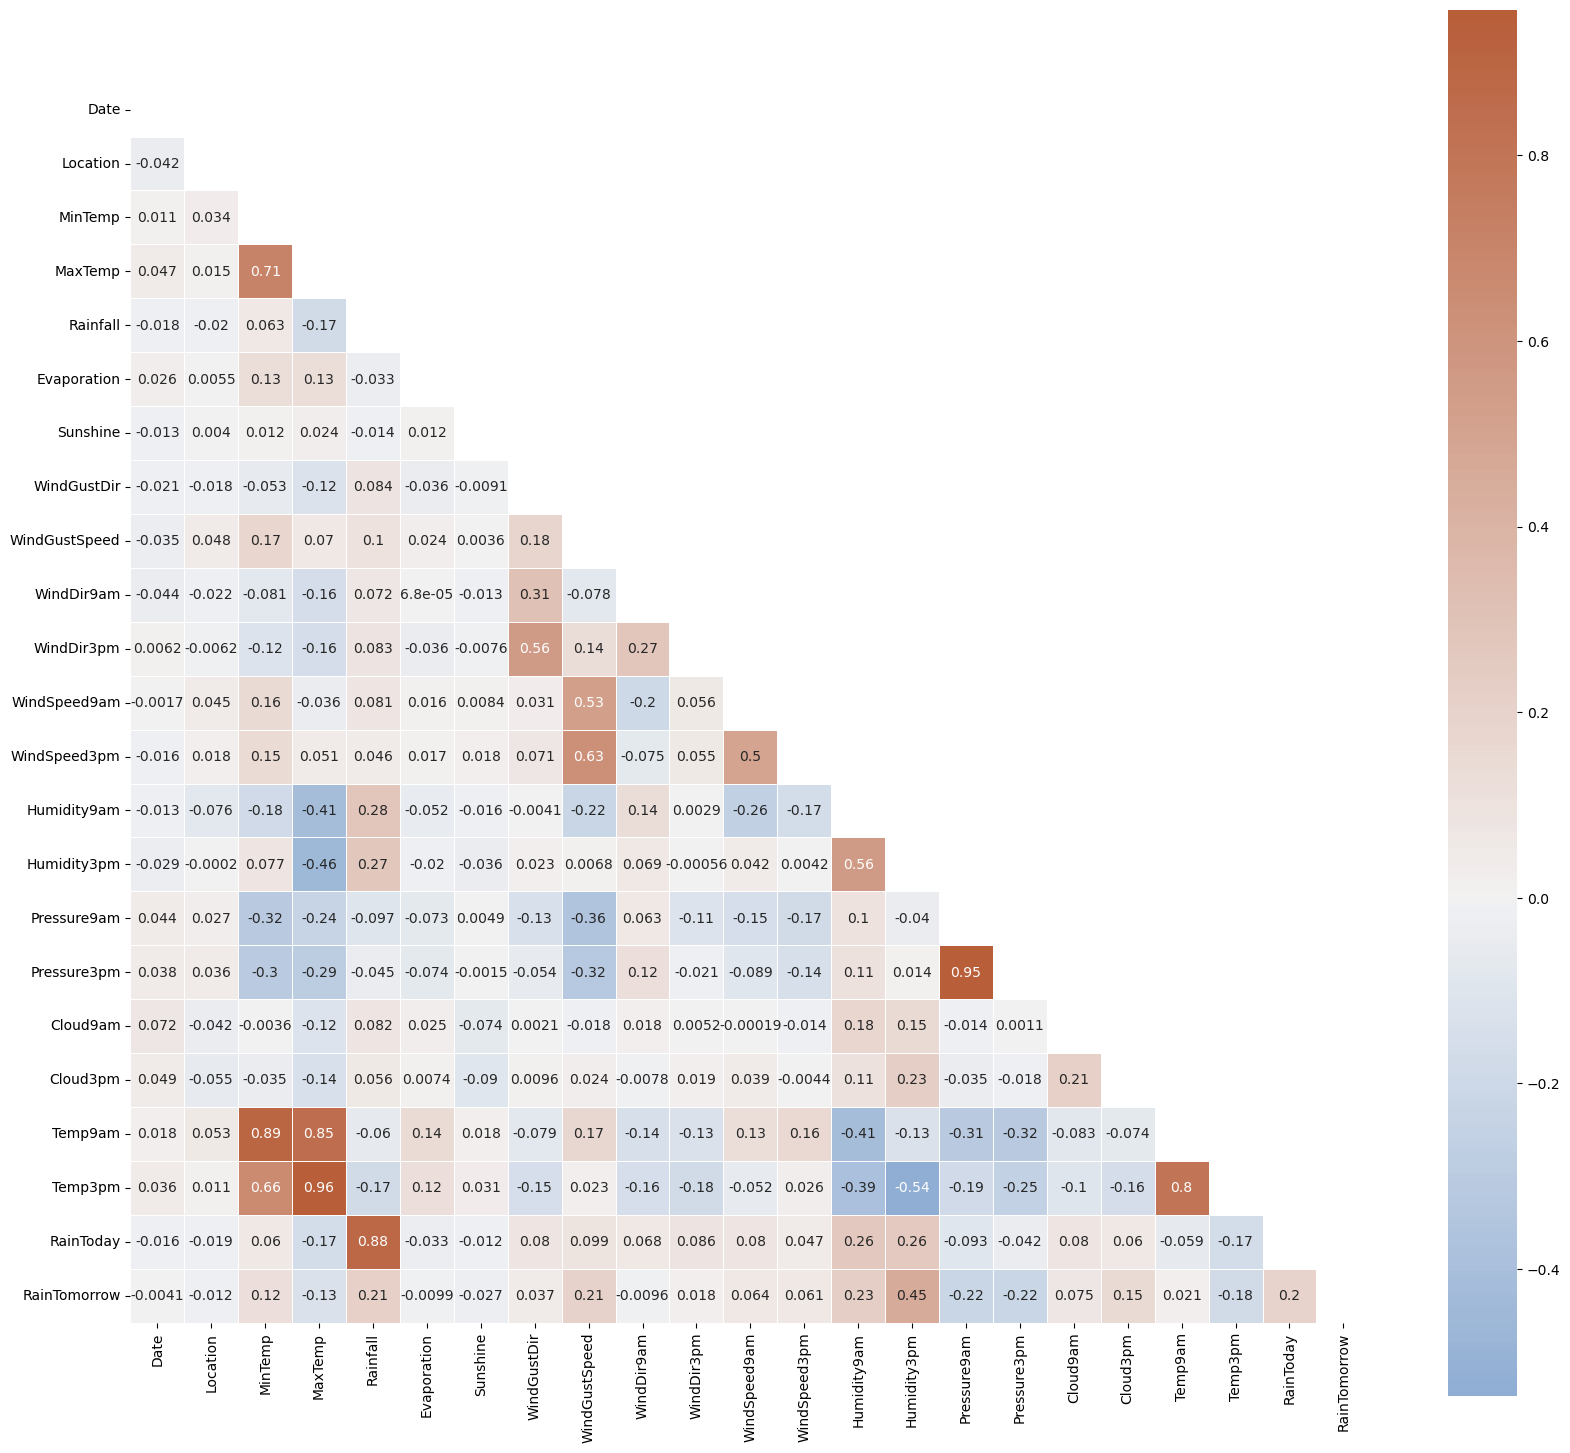

In [20]:
# Correlation Heatmap
corr = oversampled.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

The following pairs of features are having high correlation between them:

* MaxTemp and MinTemp
* Pressure9am and Pressure3pm
* Temp9am and Temp3pm
* MaxTemp and Temp3pm

# Feature Selection

Using SelectKBest for feature selection to calculate a score for each feature indicating how strongly it relates to the target variable.

In [21]:
from sklearn.feature_selection import SelectKBest, f_classif

X = oversampled.drop('RainTomorrow', axis=1)
y = oversampled['RainTomorrow']

selector = SelectKBest(score_func=f_classif, k=21)  
X_new = selector.fit_transform(X, y)

In [22]:
selected_columns = X.columns[selector.get_support()]
selected_columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [23]:
features = oversampled[selected_columns]
target = y

# Splitting dataset
75% training set 25% test set

In [24]:
# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Feature Scaling
To prevent features with larger values from dominating those with smaller values. Otherwise, a model might wrongly think that a particular feature is more important than others just because of scale.

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Setting up evaluation metrics

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
def evaluate_model(model, name):
    y_pred = model.predict(X_test)
    print(f"\n Evaluation for {name}:")
    print("Accuracy :", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, pos_label=1.0))
    print("Recall   :", recall_score(y_test, y_pred, pos_label=1.0))
    print("F1 Score :", f1_score(y_test, y_pred, pos_label=1.0))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Model Training

**Model-1: Logistic Regression**

In [27]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
evaluate_model(log_reg, "Logistic Regression")


 Evaluation for Logistic Regression:
Accuracy : 0.741365715186879
Precision: 0.7363128491620111
Recall   : 0.679614987968374
F1 Score : 0.7068287450840186

Classification Report:
               precision    recall  f1-score   support

         0.0       0.75      0.79      0.77     10296
         1.0       0.74      0.68      0.71      8727

    accuracy                           0.74     19023
   macro avg       0.74      0.74      0.74     19023
weighted avg       0.74      0.74      0.74     19023



**Model-2: Decision Tree**

In [28]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=123)
dt.fit(X_train, y_train)
evaluate_model(dt, "Decision Tree")


 Evaluation for Decision Tree:
Accuracy : 0.8944435683120433
Precision: 0.836859520705906
Recall   : 0.9563423856995531
F1 Score : 0.8926203208556149

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.84      0.90     10296
         1.0       0.84      0.96      0.89      8727

    accuracy                           0.89     19023
   macro avg       0.90      0.90      0.89     19023
weighted avg       0.90      0.89      0.89     19023



**Model-3: Neural Network (Multilayer Perceptron)**

In [29]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=123)
mlp.fit(X_train, y_train)
evaluate_model(mlp, "Neural Network (MLP)")


 Evaluation for Neural Network (MLP):
Accuracy : 0.7883614571834096
Precision: 0.7638935668575277
Recall   : 0.7796493640426263
F1 Score : 0.7716910513780197

Classification Report:
               precision    recall  f1-score   support

         0.0       0.81      0.80      0.80     10296
         1.0       0.76      0.78      0.77      8727

    accuracy                           0.79     19023
   macro avg       0.79      0.79      0.79     19023
weighted avg       0.79      0.79      0.79     19023



# Model Comparison

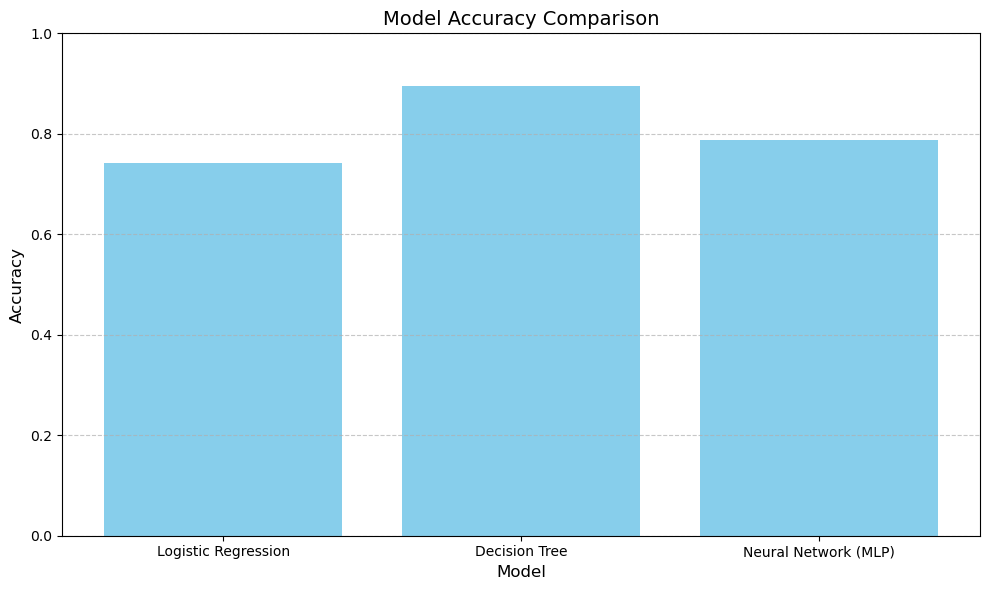

In [30]:
# Calculating accuracy scores again to store in array
accuracy_lr = accuracy_score(y_test, log_reg.predict(X_test))
accuracy_dt = accuracy_score(y_test, dt.predict(X_test))
accuracy_mlp = accuracy_score(y_test, mlp.predict(X_test))

models = ['Logistic Regression', 'Decision Tree', 'Neural Network (MLP)']
accuracies = [accuracy_lr, accuracy_dt, accuracy_mlp]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Prediction from new sample data

In [31]:
# Sydney, Austrailia weather data on 16th june
new = pd.DataFrame([{
    'Location': 'Sydney',
    'MinTemp': 5.0,
    'MaxTemp': 17.0,
    'Rainfall': 0.0,
    'Evaporation': 2.0,
    'Sunshine': 6.0,
    'WindGustDir': 'NNW',
    'WindGustSpeed': 12.0,
    'WindDir9am': 'NNW',
    'WindDir3pm': 'WNW',
    'WindSpeed9am': 9.0,
    'WindSpeed3pm': 10.0,
    'Humidity9am': 70.0,
    'Humidity3pm': 50.0,
    'Pressure9am': 1022.0,
    'Pressure3pm': 1022.0,
    'Cloud9am': 1.0,
    'Cloud3pm': 3.0,
    'Temp9am': 10.0,
    'Temp3pm': 16.0,
    'RainToday': 0
}])


Preprocessing this data like we did to our training data.

In [32]:
# Encode categorical features using trained label encoders
for col in new.select_dtypes(include='object').columns:
    if col in lencoders:
        new[col] = lencoders[col].transform(new[col])
    else:
        print(f"Warning: No encoder found for column: {col}")

In [33]:
# Reorder columns to match features selected in training data (X)
new = new[selected_columns]

In [34]:
# Scale
new_scaled = scaler.transform(new)

Using Decsision Tree model since its accuracy is the highest.

In [35]:
# Predict
prediction = dt.predict(new_scaled)
print("Prediction (RainTomorrow):", "Yes" if prediction[0] == 1 else "No")

Prediction (RainTomorrow): No


# Conclusion 
Using Decision Tree model predicts accurate result for rain prediction in Sydney, Austrailia for the date 17th June as it did not rain this day.